In [1]:
pip install scikit-learn

Looking in indexes: http://jetson.webredirect.org/jp6/cu122
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np

In [6]:
sample_df = pd.read_csv('dataset/iris_flower.csv', header=0)

In [7]:
sample_df.head()

,F1,F2,F3,F4,Label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# Encode target labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
sample_df["Label"] = label_encoder.fit_transform(sample_df["Label"])

In [26]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split


In [27]:
input_dim = 4
hidden_dim1 = 12
hidden_dim2 = 8
output_dim = 3
num_epochs = 1000
batch_size = 16
learning_rate = 0.001

In [28]:
class IrisDataset(Dataset):
    def __init__(self, data):
        # In the initialization method, we define how to load our dataset.
        # Here, we use data.drop() to identify and exclude the 'Outcome' column, extracting features and labels.
        self.features = torch.tensor(data.drop('Outcome', axis=1).values, dtype=torch.float32)
        self.labels = torch.tensor(data['Outcome'].values, dtype=torch.long)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [29]:
import torch
from torch.utils.data import DataLoader, random_split
from sklearn.model_selection import train_test_split



In [30]:
 #Split features and target
X = sample_df[['F1', 'F2', 'F3', 'F4']].values
y = sample_df['Label'].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [31]:
print(y_test_tensor)

tensor([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2,
        2, 2, 2, 2, 0, 0])


In [34]:
# DataLoader

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)



In [35]:
import torch
import torch.nn as nn
import torch.optim as optim

class IrisClassifier(nn.Module):
    def __init__(self):  # Corrected the typo here
        super(IrisClassifier, self).__init__()
        self.fc1 = nn.Linear(4, 16)  # Input has 4 features
        self.fc2 = nn.Linear(16, 3)  # Output has 3 classes

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU activation
        x = self.fc2(x)  # Output layer
        return x

In [37]:
model = IrisClassifier()  # Initialize the model correctly
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Optimizer should work fine

In [38]:
# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Epoch [1/50], Loss: 0.9350
Epoch [2/50], Loss: 1.0167
Epoch [3/50], Loss: 1.1141
Epoch [4/50], Loss: 1.0616
Epoch [5/50], Loss: 1.1025
Epoch [6/50], Loss: 1.0490
Epoch [7/50], Loss: 0.9759
Epoch [8/50], Loss: 0.9803
Epoch [9/50], Loss: 0.9889
Epoch [10/50], Loss: 0.9277
Epoch [11/50], Loss: 0.8598
Epoch [12/50], Loss: 0.9348
Epoch [13/50], Loss: 0.9149
Epoch [14/50], Loss: 0.8554
Epoch [15/50], Loss: 0.7816
Epoch [16/50], Loss: 0.8076
Epoch [17/50], Loss: 0.8244
Epoch [18/50], Loss: 0.7999
Epoch [19/50], Loss: 0.7606
Epoch [20/50], Loss: 0.8547
Epoch [21/50], Loss: 0.8284
Epoch [22/50], Loss: 0.7394
Epoch [23/50], Loss: 0.7587
Epoch [24/50], Loss: 0.6618
Epoch [25/50], Loss: 0.4840
Epoch [26/50], Loss: 0.7148
Epoch [27/50], Loss: 0.6680
Epoch [28/50], Loss: 0.6620
Epoch [29/50], Loss: 0.7113
Epoch [30/50], Loss: 0.6551
Epoch [31/50], Loss: 0.5906
Epoch [32/50], Loss: 0.4741
Epoch [33/50], Loss: 0.4925
Epoch [34/50], Loss: 0.7247
Epoch [35/50], Loss: 0.5477
Epoch [36/50], Loss: 0.5132
E

In [43]:
# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Train the model
num_epochs = 1000
train_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for features, labels in train_loader:
        outputs = model(features)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(correct / total)

# Evaluate the model on the test set
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for features, labels in test_loader:
            outputs = model(features)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    test_accuracies.append(correct / total)

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, '
              f'Train Accuracy: {correct/total:.4f}, Test Accuracy: {test_accuracies[-1]:.4f}')



Epoch [10/1000], Loss: 0.3773, Train Accuracy: 0.9667, Test Accuracy: 0.9667
Epoch [20/1000], Loss: 0.3402, Train Accuracy: 0.9667, Test Accuracy: 0.9667
Epoch [30/1000], Loss: 0.2992, Train Accuracy: 0.9667, Test Accuracy: 0.9667
Epoch [40/1000], Loss: 0.2689, Train Accuracy: 0.9667, Test Accuracy: 0.9667
Epoch [50/1000], Loss: 0.2374, Train Accuracy: 0.9667, Test Accuracy: 0.9667
Epoch [60/1000], Loss: 0.2187, Train Accuracy: 0.9667, Test Accuracy: 0.9667
Epoch [70/1000], Loss: 0.1967, Train Accuracy: 0.9667, Test Accuracy: 0.9667
Epoch [80/1000], Loss: 0.1694, Train Accuracy: 0.9667, Test Accuracy: 0.9667
Epoch [90/1000], Loss: 0.1607, Train Accuracy: 0.9667, Test Accuracy: 0.9667
Epoch [100/1000], Loss: 0.1477, Train Accuracy: 0.9667, Test Accuracy: 0.9667
Epoch [110/1000], Loss: 0.1385, Train Accuracy: 0.9667, Test Accuracy: 0.9667
Epoch [120/1000], Loss: 0.1269, Train Accuracy: 0.9667, Test Accuracy: 0.9667
Epoch [130/1000], Loss: 0.1258, Train Accuracy: 0.9667, Test Accuracy: 0.

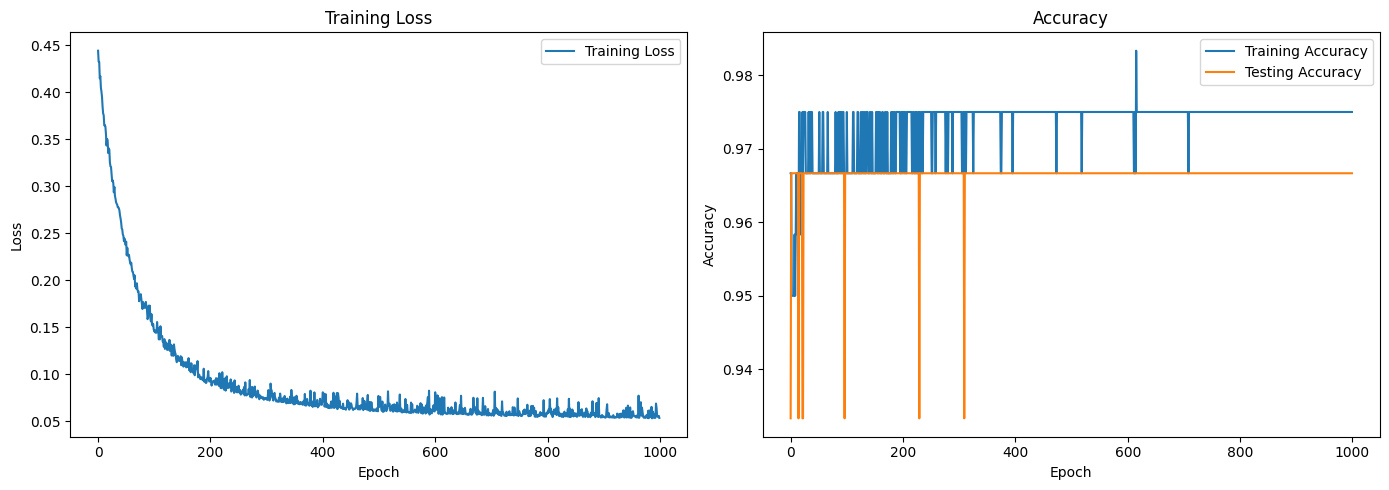

In [44]:
#Plot the training loss and accuracies
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [46]:
# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model.eval()
with torch.no_grad():
    y_pred = []
    y_true = []
    for features, labels in test_loader:
        outputs = model(features)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.numpy())
        y_true.extend(labels.numpy())

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.97


Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



([<matplotlib.axis.YTick at 0xfffee2e56350>,
 [Text(0, 0, 'Iris-setosa'),
  Text(0, 1, 'Iris-versicolor'),
  Text(0, 2, 'Iris-virginica')])

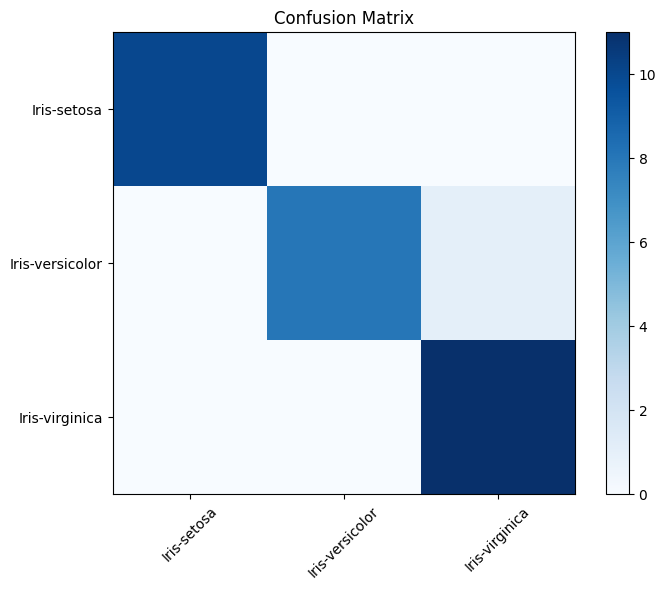

In [49]:
# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred, target_names=label_encoder.classes_)

print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(label_encoder.classes_))
plt.xticks(tick_marks, label_encoder.classes_, rotation=45)
plt.yticks(tick_marks, label_encoder.classes_)

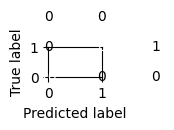

In [50]:
# Loop over data dimensions and create text annotations.
fmt = 'd'
thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], fmt),
             ha="center", va="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [54]:
# Save the model
model_path = 'iris_model2.pt'
torch.save(model.state_dict(), model_path)

# Load the model
loaded_model = IrisClassifier()
loaded_model.load_state_dict(torch.load(model_path))
loaded_model.eval()

IrisClassifier(
  (fc1): Linear(in_features=4, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=3, bias=True)
)

In [56]:
# Select a sample for prediction (for example, the first sample in X)
dtest = X[0, :]  # Take the first sample
dtest = np.expand_dims(dtest, axis=0)  # Add batch dimension

# Convert dtest to a torch tensor and float type
dtest_tensor = torch.tensor(dtest, dtype=torch.float32)

# Get predictions
with torch.no_grad():
    predictions = loaded_model(dtest_tensor)

# Since you have three classes, use softmax to get probabilities
softmax = torch.nn.Softmax(dim=1)
probabilities = softmax(predictions).numpy()[0]

# Get the predicted class
predicted_class = np.argmax(probabilities)

# Get class labels from LabelEncoder
predicted_class_label = label_encoder.inverse_transform([predicted_class])[0]

print(f"Probabilities for each class: {probabilities}")
print(f"The predicted class is: {predicted_class_label}")

Probabilities for each class: [9.9995780e-01 4.2249994e-05 1.8433550e-15]
The predicted class is: Iris-setosa
